<h1> Customer Churn prediction<h1/>
<h4> In this project I analyze Customer Churn data from Kaggle.<h4/>

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
#load the dataset
train_data=pd.read_csv('customer_churn_dataset-training-master.csv')
train_data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [83]:
#drop unnecessary column
train_data.drop('CustomerID',axis=1,inplace=True)

In [84]:
test_data.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


<h2> Explore Data<h2/>

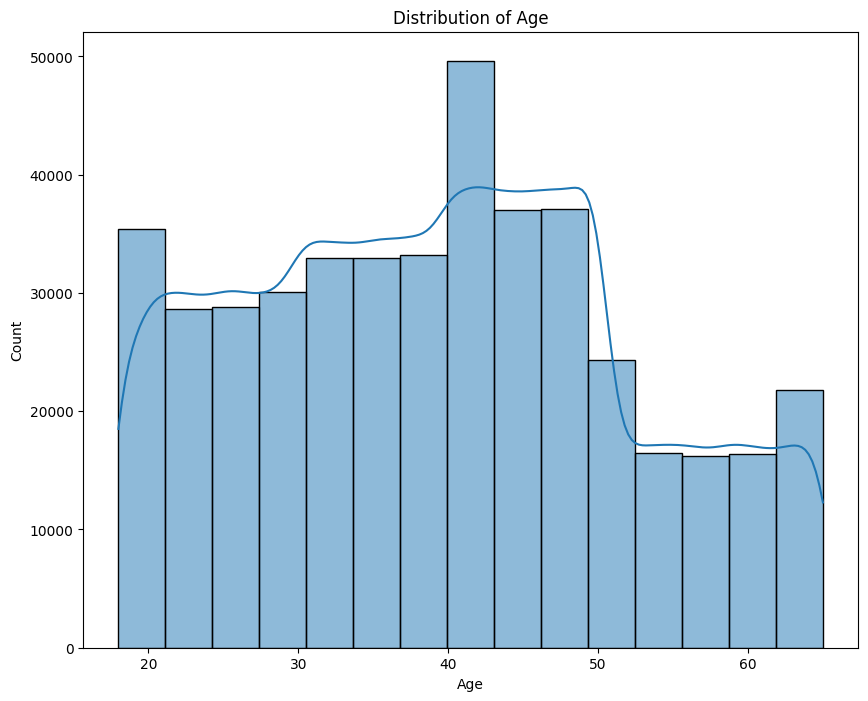

In [85]:
# histogram with age distribution
plt.figure(figsize=(10,8))
sns.histplot(x='Age',data=train_data,kde=True,bins=15)
plt.title("Distribution of Age")
plt.show()

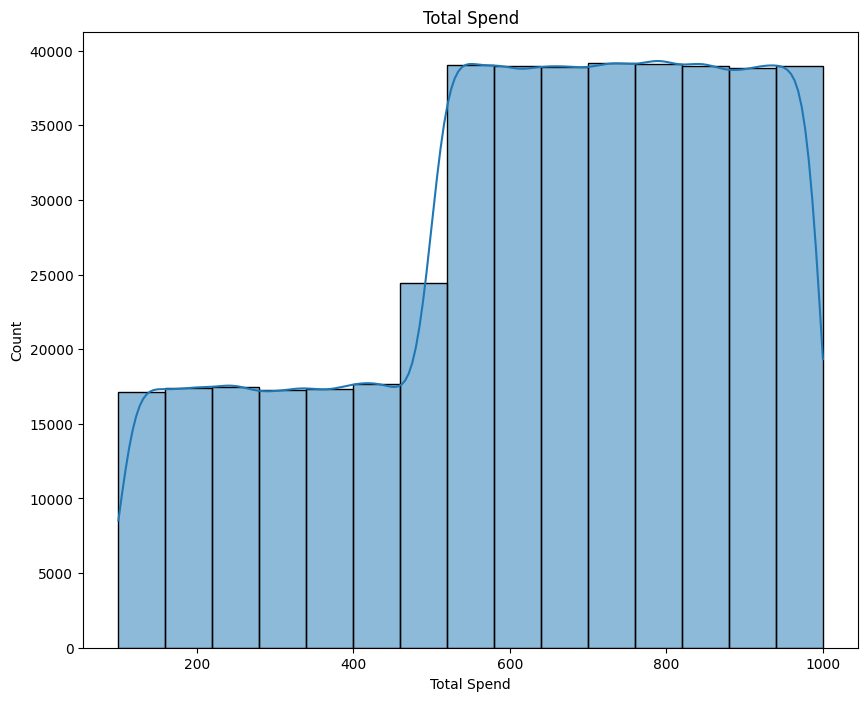

In [86]:
plt.figure(figsize=(10,8))
sns.histplot(x='Total Spend',data=train_data,kde=True,bins=15)
plt.title("Total Spend")
plt.show()

In [87]:
#explore the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  float64
 3   Usage Frequency    440832 non-null  float64
 4   Support Calls      440832 non-null  float64
 5   Payment Delay      440832 non-null  float64
 6   Subscription Type  440832 non-null  object 
 7   Contract Length    440832 non-null  object 
 8   Total Spend        440832 non-null  float64
 9   Last Interaction   440832 non-null  float64
 10  Churn              440832 non-null  float64
dtypes: float64(8), object(3)
memory usage: 37.0+ MB


In [88]:
#check for missing values
train_data.isna().sum()

,0
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1
Last Interaction,1


In [89]:
#drop N/A
train_data.dropna(inplace=True)

In [90]:
train_data.isnull()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
440828,False,False,False,False,False,False,False,False,False,False,False
440829,False,False,False,False,False,False,False,False,False,False,False
440830,False,False,False,False,False,False,False,False,False,False,False
440831,False,False,False,False,False,False,False,False,False,False,False


In [91]:
#drop duplicates
duplicates = train_data[train_data.duplicated()]
duplicates
df_no_dup =train_data.drop_duplicates()

In [92]:
# find the number of each churn label
count_0 = len(train_data[train_data['Churn'] == 0])

count_1 = len(train_data[train_data['Churn'] == 1])
print("Number of 0s:", count_0)
print("Number of 1s:", count_1)

Number of 0s: 190833
Number of 1s: 249999


In [93]:
#balance the data

if count_0 > count_1:
    class_to_reduce = 0
    target_count = count_1
else:
    class_to_reduce = 1
    target_count = count_0

df_balanced = pd.concat([
    train_data[train_data['Churn'] != class_to_reduce],
    train_data[train_data['Churn'] == class_to_reduce].sample(n=target_count, random_state=42)
])

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


print("Num after balance :")
print(df_balanced['Churn'].value_counts())



df = df_balanced.copy()

Num after balance :
Churn
0.0    190833
1.0    190833
Name: count, dtype: int64




<h1>
Label Encoder in order to convert categorical values to numerical
<h1/>



In [94]:
from sklearn.preprocessing import LabelEncoder

categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
categorical_features

['Gender', 'Subscription Type', 'Contract Length']

In [95]:
for feature in categorical_features:
    df[feature] = LabelEncoder().fit_transform(df[feature])
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,32.0,1,19.0,27.0,1.0,0.0,0,2,851.25,24.0,0.0
1,40.0,0,32.0,3.0,3.0,22.0,0,2,615.00,19.0,1.0
2,45.0,0,50.0,2.0,1.0,14.0,1,2,531.22,10.0,0.0
3,22.0,0,58.0,11.0,0.0,7.0,2,2,667.34,4.0,0.0
4,40.0,0,28.0,27.0,4.0,12.0,1,2,558.11,4.0,0.0



<h1>
Train test split
<h1/>

In [96]:
#from re import X
from sklearn.model_selection import train_test_split

X = df.drop('Churn',axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size  = 0.2, random_state =42 )

In [97]:
X.isna().sum()

,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0
Last Interaction,0


In [98]:
print(X)

         Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0       32.0       1    19.0             27.0            1.0            0.0   
1       40.0       0    32.0              3.0            3.0           22.0   
2       45.0       0    50.0              2.0            1.0           14.0   
3       22.0       0    58.0             11.0            0.0            7.0   
4       40.0       0    28.0             27.0            4.0           12.0   
...      ...     ...     ...              ...            ...            ...   
381661  42.0       1    17.0              7.0            2.0           29.0   
381662  27.0       1    14.0             27.0            9.0           17.0   
381663  32.0       1    10.0              7.0            0.0           15.0   
381664  49.0       1    42.0              8.0            1.0            0.0   
381665  40.0       1     2.0             20.0            4.0           11.0   

        Subscription Type  Contract Length  Total S

<h1>
Logistic regression
<h1/>

In [99]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [109]:
# predict X_train
y_pred_logn = classifier.predict(X_train)

In [110]:
from sklearn.metrics import  accuracy_score
cm = accuracy_score(y_train,y_pred_logn)
cm

0.8550987122214507

In [111]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,y_pred_logn)
cm

array([[135281,  17524],
       [ 26719, 125808]])

In [112]:
#predict X_test
x_test_pred = classifier.predict(X_test)

In [113]:
from sklearn.metrics import  accuracy_score
cm_test = accuracy_score(y_test,x_test_pred)
cm_test

0.8571409856682475